# Prepare a classification model using SVM for salary data
---

## Data Description:

Feature | Description
:-: | :-:
age | age of a person
workclass | A work class is a grouping of work 
education | Education of an individuals	
maritalstatus | Marital status of an individulas	
occupation | occupation of an individuals
relationship | familial relationship status
race | Race of an Individual
sex | Gender of an Individual
capitalgain | profit received from the sale of an investment	
capitalloss | A decrease in the value of a capital asset
hoursperweek | number of hours work per week	
native | Native country of an individual
Salary | salary of an individual

## Data Collection

We have been given seperate datasets for training and testing. We will load both and perform the same operations on both so that they have the same kind of features

In [1]:
# Importing pandas for handling data
import pandas as pd

In [2]:
# Loading training data
train = pd.read_csv("SalaryData_Train(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
# Loading testing data
test = pd.read_csv("SalaryData_Test(1).csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


## Data Preparation

### Data Exploration

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


There are no na values, for nearly 30 Thousand entries, and 14 features. We have to create a model to predict salary class

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


Same for testing data, which has nearly 15 Thousand entries

In [6]:
train.select_dtypes('object').nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

In [7]:
test.select_dtypes('object').nunique()

workclass         7
education        16
maritalstatus     7
occupation       14
relationship      6
race              5
sex               2
native           40
Salary            2
dtype: int64

We can confirm that train and test data have the same number of classes for each categorical feature

In [8]:
# Getting unique values for each feature
train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

age, capitalgain, capitalloss, hoursperweek seem to be continuous features. The rest have very few unique values and most probably are categorical

<Axes: xlabel='age', ylabel='Count'>

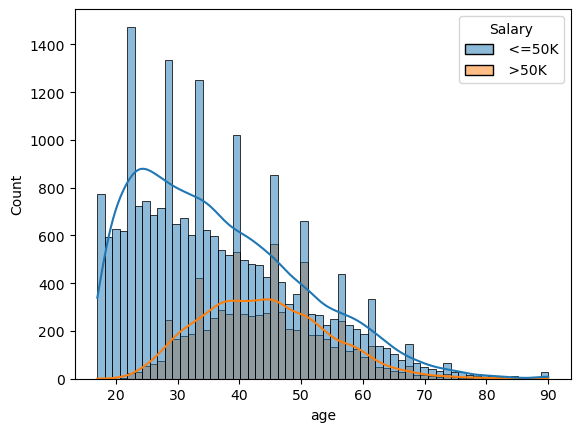

In [9]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for age for both types of salary values
sns.histplot(train, x = 'age', hue = 'Salary', kde = True)

<Axes: xlabel='age', ylabel='Count'>

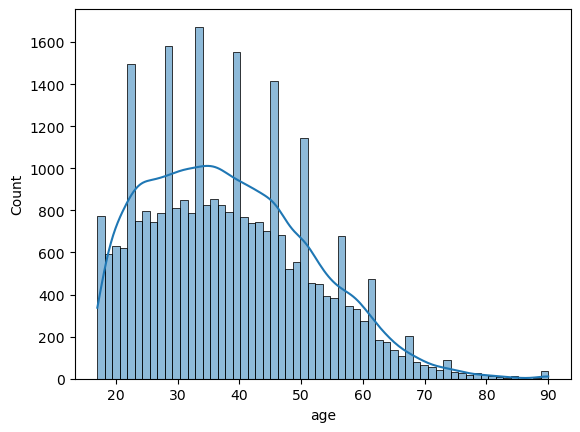

In [10]:
sns.histplot(train, x = 'age', kde = True)

We have a right-skewed data here

In [11]:
# Value counts for workclass
train.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

<Axes: xlabel='count', ylabel='workclass'>

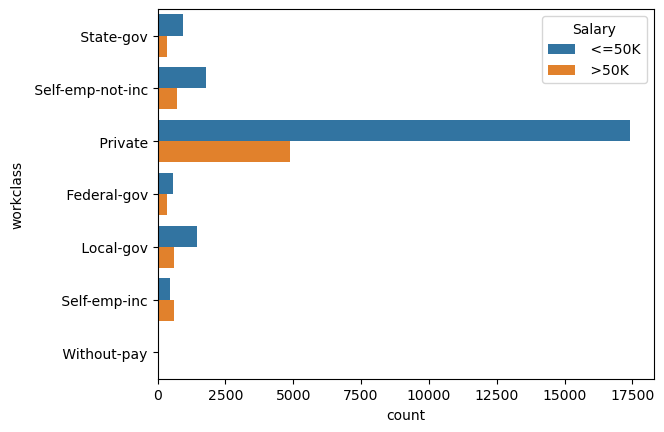

In [12]:
# Countplot for workclass for both Salary values
sns.countplot(train, y = 'workclass', hue = 'Salary')

In [13]:
# Value counts for education
train.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [14]:
# Value counts for educationno
train.educationno.value_counts()

9     9840
10    6677
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: educationno, dtype: int64

<Axes: xlabel='count', ylabel='education'>

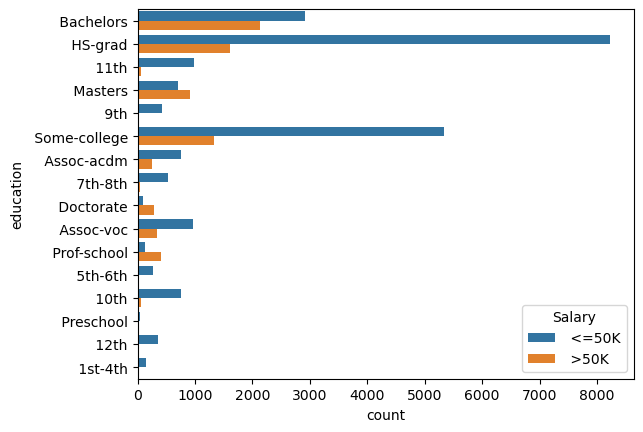

In [15]:
# Countplot for education for each value of Salary
sns.countplot(train, y = 'education', hue = 'Salary')

education and educationno have a one to one mapping where education contains a descriptor for the qualification and educationno contains a grade level for the descriptor. We can remove either depending upon the naive bayes classification model we will use

In [16]:
# Value counts for maritalstatus
train.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

<Axes: xlabel='count', ylabel='maritalstatus'>

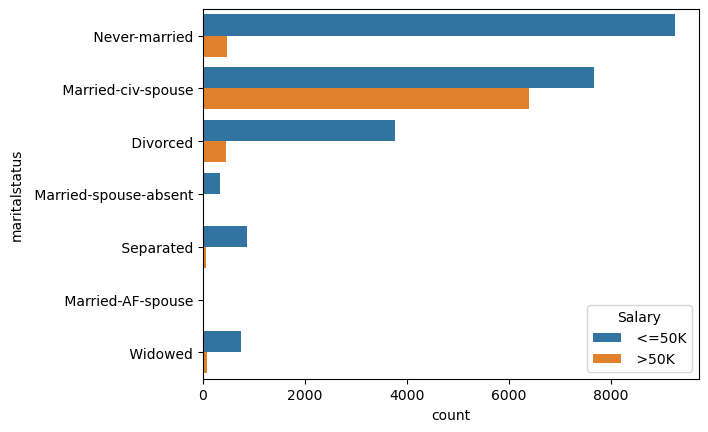

In [17]:
# Count plot for maritalstatus for both values of Salary
sns.countplot(train, y = 'maritalstatus', hue = 'Salary')

In [18]:
# Value counts for occupation
train.occupation.value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1965
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

<Axes: xlabel='count', ylabel='occupation'>

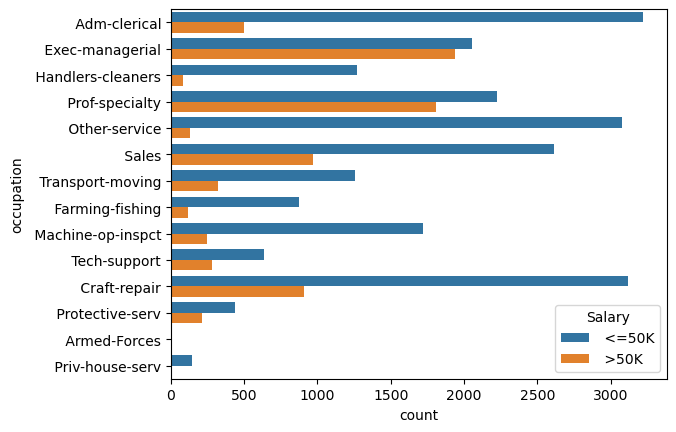

In [19]:
# Countplot for occupation for both values of Salary
sns.countplot(train, y = 'occupation', hue = 'Salary')

In [20]:
# Value counts for relationship
train.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

<Axes: xlabel='count', ylabel='relationship'>

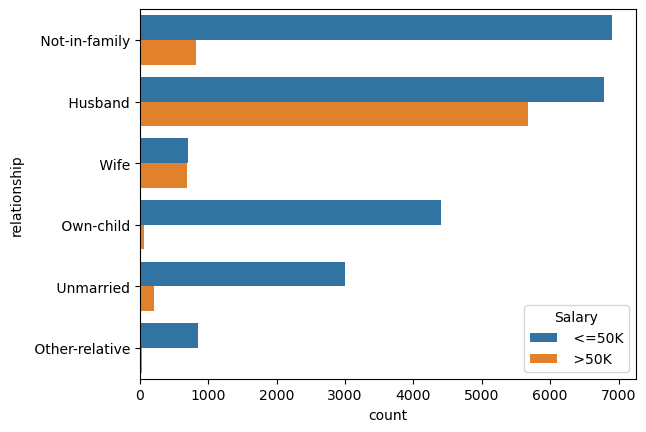

In [21]:
# Countplot for relationship for both values of Salary
sns.countplot(train, y = 'relationship', hue = 'Salary')

In [22]:
# Value counts for race
train.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

<Axes: xlabel='count', ylabel='race'>

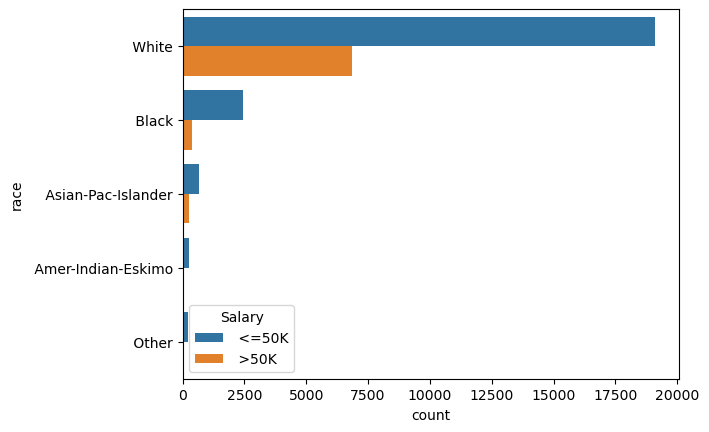

In [23]:
# Countplot for race for both values of Salary
sns.countplot(train, y = 'race', hue = 'Salary')

In [24]:
# Value counts for sex
train.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

<Axes: xlabel='count', ylabel='sex'>

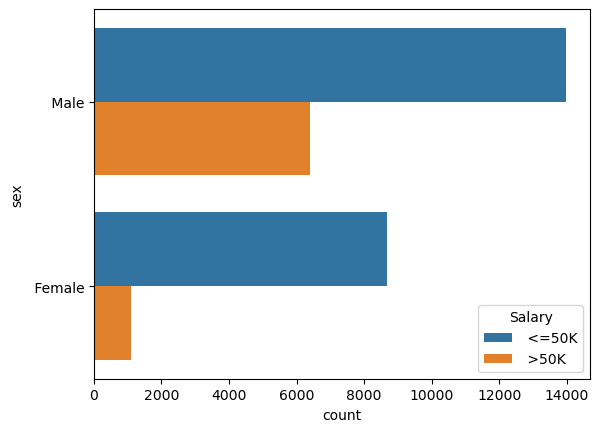

In [25]:
# Countplot for sex for both values of Salary
sns.countplot(train, y = 'sex', hue = 'Salary')

<Axes: xlabel='capitalgain', ylabel='Count'>

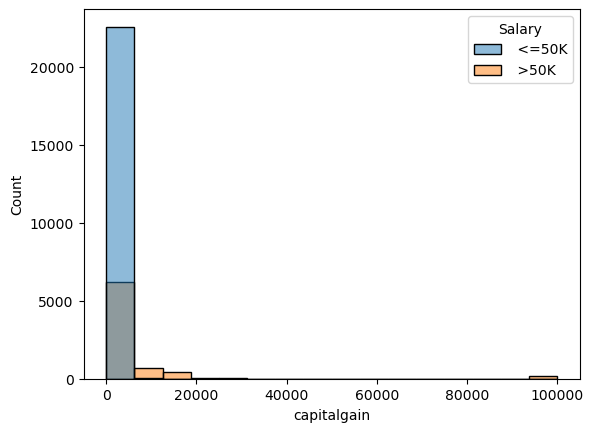

In [26]:
# Histogram for capitalgain for both values of Salary
sns.histplot(train, x = 'capitalgain', hue = 'Salary')

<Axes: xlabel='capitalgain', ylabel='Count'>

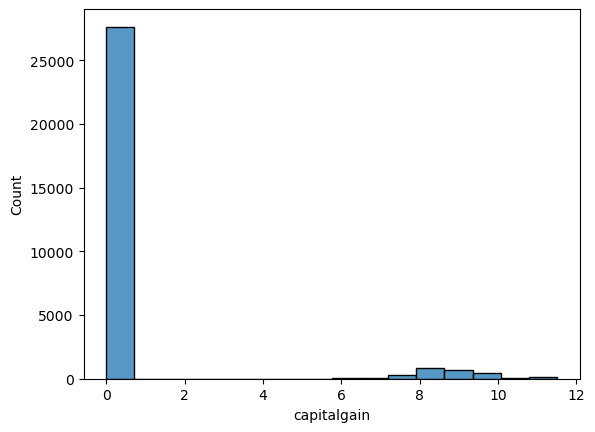

In [27]:
# Importing library for numeric operations
import numpy as np

# Histogram for capitalgain after apply log transformation on it
sns.histplot(x = np.log(train.capitalgain + 1))

Applying log transformation does not help as there is a disproportionate number of 0 values for the feature

<Axes: xlabel='capitalgain', ylabel='Count'>

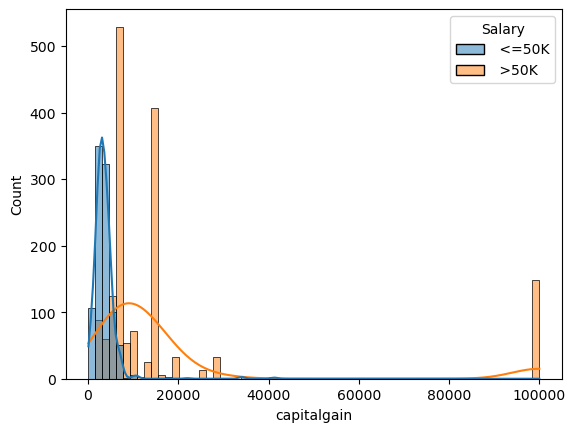

In [28]:
# Histogram for capitalgain greater than 0 for both values of Salary
sns.histplot(train[train.capitalgain > 0], x = 'capitalgain', hue = 'Salary', kde = True)

Most records have no or low capital gain

<Axes: ylabel='Frequency'>

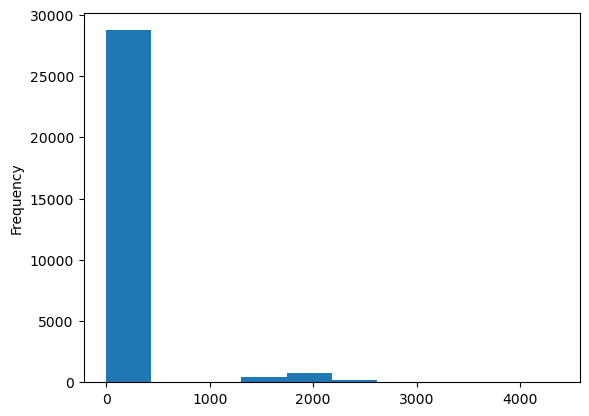

In [29]:
# Histogram for capitalloss
train.capitalloss.plot(kind = 'hist')

<Axes: xlabel='capitalloss', ylabel='Count'>

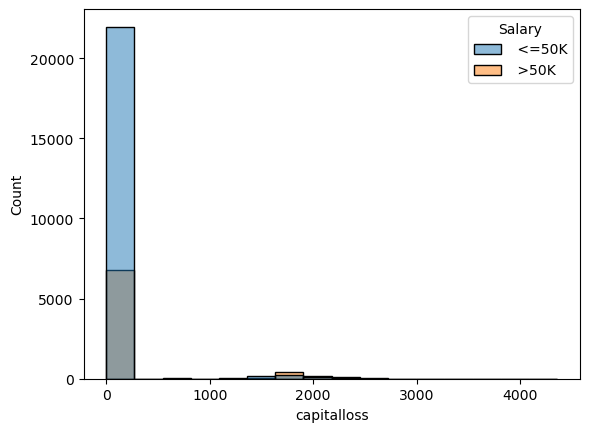

In [30]:
# Histogram for capitalloss for both values of Salary
sns.histplot(train, x = 'capitalloss', hue = 'Salary')

<Axes: xlabel='capitalloss', ylabel='Count'>

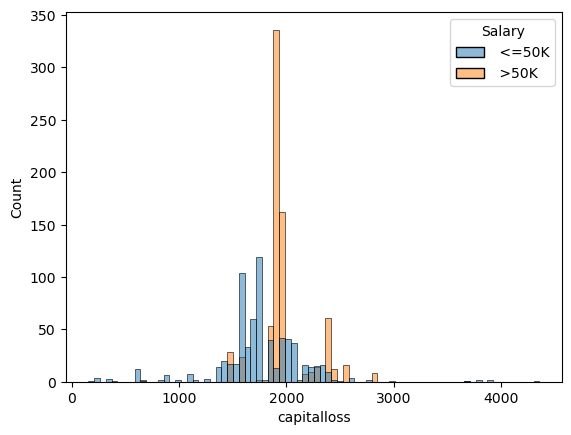

In [31]:
# Histogram for capitalloss greater than 0 for both values of Salary
sns.histplot(train[train.capitalloss > 0], x = 'capitalloss', hue = 'Salary')

Most records have no capital loss. Few records show capital loss in the 1000 to 3000 range. Applying log transformation will have the same result as capitalgain and hence not worth it

<Axes: ylabel='Frequency'>

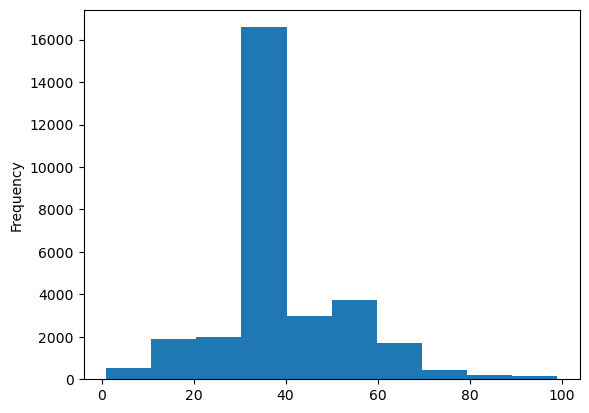

In [32]:
# Histogram for hoursperweek
train.hoursperweek.plot(kind = 'hist')

<Axes: xlabel='hoursperweek', ylabel='Count'>

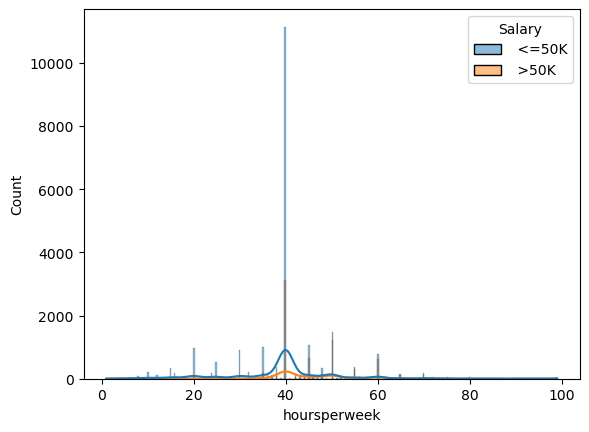

In [33]:
# Histogram for hoursperweek for both values of Salary
sns.histplot(train, x = 'hoursperweek', hue = 'Salary', kde = True)






Most records work 35 to 40 hours per week.

In [34]:
# Value counts for native
train.native.value_counts()

 United-States                 27504
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

<Axes: xlabel='count', ylabel='native'>

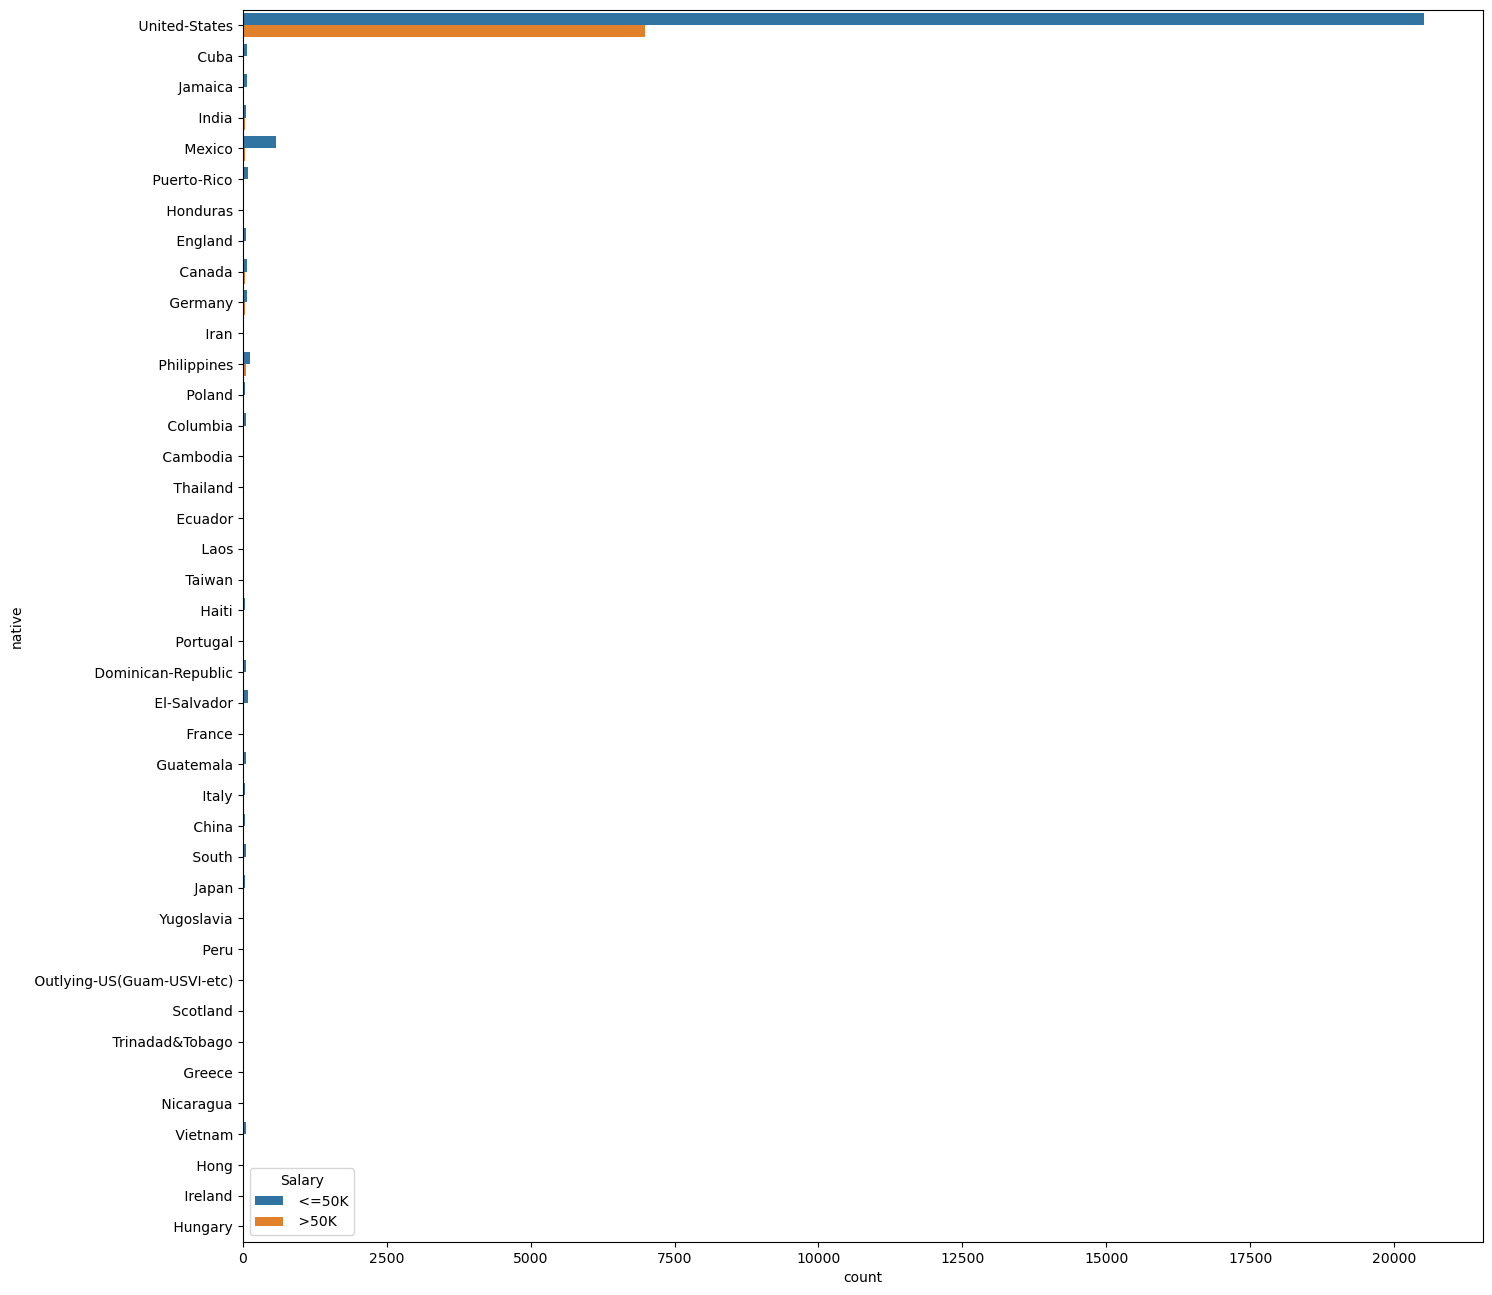

In [35]:
# Countplot for native for both values of Salary
plt.figure(figsize = (16,16))
sns.countplot(train, y = 'native', hue = 'Salary')

<Axes: xlabel='count', ylabel='native'>

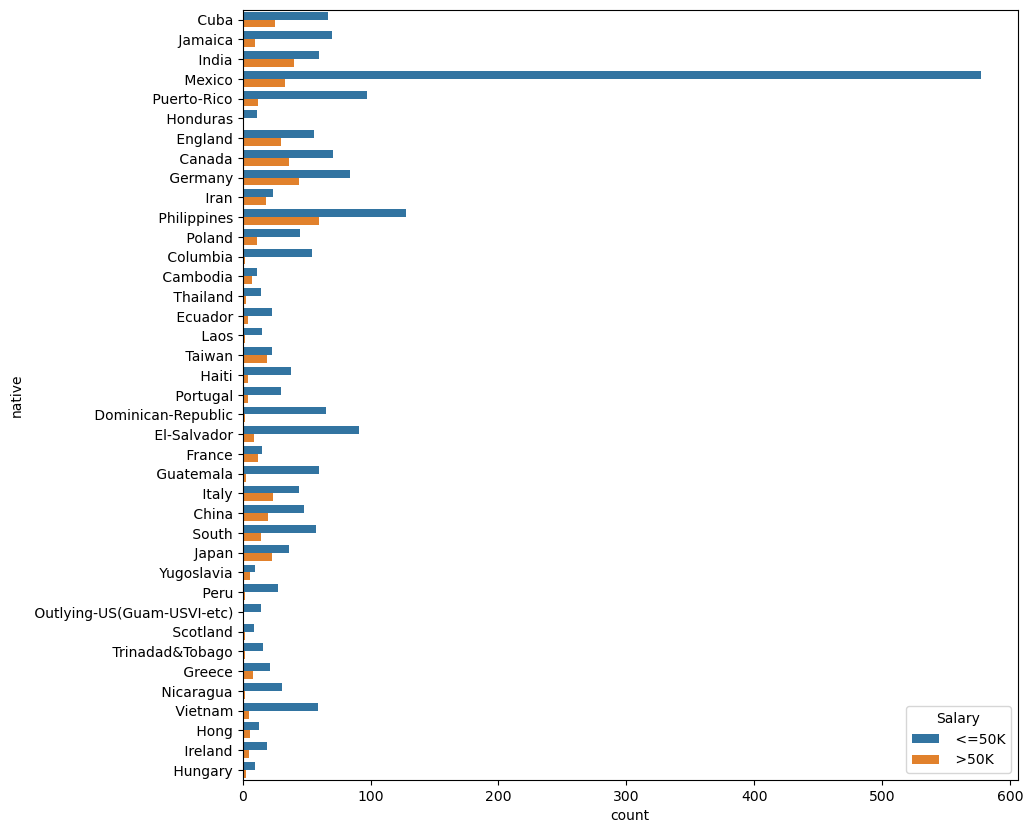

In [36]:
# Countplot for native except USA for both values of Salary
plt.figure(figsize = (10,10))
sns.countplot(train[train.native != ' United-States'], y = 'native', hue = 'Salary')

In [37]:
# Value counts for Salary
train.Salary.value_counts()

 <=50K    22653
 >50K      7508
Name: Salary, dtype: int64

In [38]:
# Percent counts for Salary
train.Salary.value_counts(normalize=True)

 <=50K    0.751069
 >50K     0.248931
Name: Salary, dtype: float64

<Axes: xlabel='Salary', ylabel='count'>

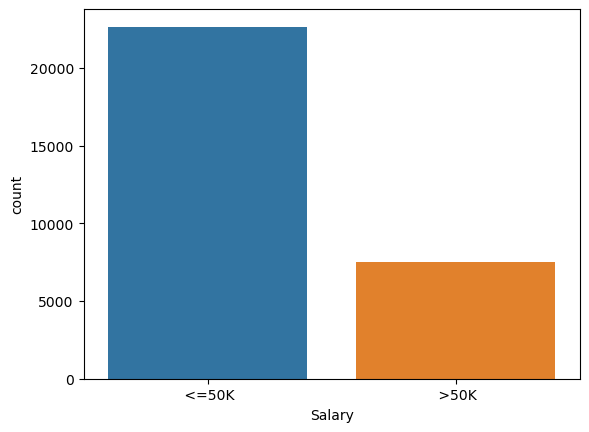

In [39]:
# Countplot for Salary
sns.countplot(train, x = 'Salary')

This is the dependent variable which has two classes indicating salary more than or upto 50 Thousand. The data is highly imbalanced as 75% data belongs to less than 50K salary category. Balancing the classes are not strictly necessary for Naive Bayes Classifiers as they use class weights as prior probabilities while computing probability of a sample falling into one of the target class

### Data Cleaning

We will remove educationno as it is a label encoding of education and can be generated if required

In [40]:
# Removing educationno feature
train.drop(columns = ['educationno'], inplace = True)
test.drop(columns = ['educationno'], inplace = True)

In [41]:
# Defining continuous features
continuous_features = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']

In [42]:
# Defining categorical features
categorical_features = [col for col in train.columns if col not in continuous_features]

In [43]:
# Checking unique values for workclass
train.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [44]:
# Checking unique values for maritalstatus
train.maritalstatus.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [45]:
# Checking unique values for occupation
train.occupation.unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

More than 1 categorical feature has a space before every value. We will strip them off:

In [46]:
train = train.applymap(lambda x : x.strip() if type(x) == str else x)
test = test.applymap(lambda x : x.strip() if type(x) == str else x)

In [47]:
# Binarizing dependent variable
train.Salary.replace({'<=50K':0, '>50K':1}, inplace = True)
test.Salary.replace({'<=50K':0, '>50K':1}, inplace = True)

In [48]:
# Binarizing sex
train.sex.replace({'Female':0, 'Male':1}, inplace = True)
test.sex.replace({'Female':0, 'Male':1}, inplace = True)

In [49]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing numeric features
train[continuous_features] = MinMaxScaler().fit_transform(train[continuous_features])
test[continuous_features] = MinMaxScaler().fit_transform(test[continuous_features])

In [50]:
# Defining categorical features without sex and Salary as we have already binarized them
categorical_features = ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'native']

In [51]:
# One Hot Encoding categorical features
train = pd.get_dummies(train, columns = categorical_features, drop_first=True)
test = pd.get_dummies(test, columns = categorical_features, drop_first=True)

In [52]:
X_train = train.drop(columns = 'Salary')
y_train = train.Salary

X_test = test.drop(columns = 'Salary')
y_test = test.Salary

## Hyperparameter Tuning

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay

Support Vector Classifier uses linear, polynomial, rbf, or sigmoid kernel

For Kernel linear :::
Training Score : 0.7867776267365141
Test Score : 0.7881806108897742


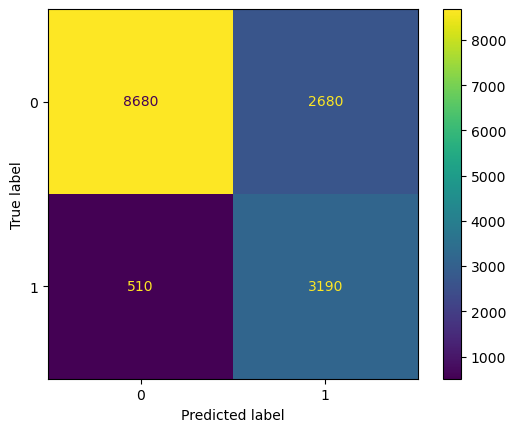

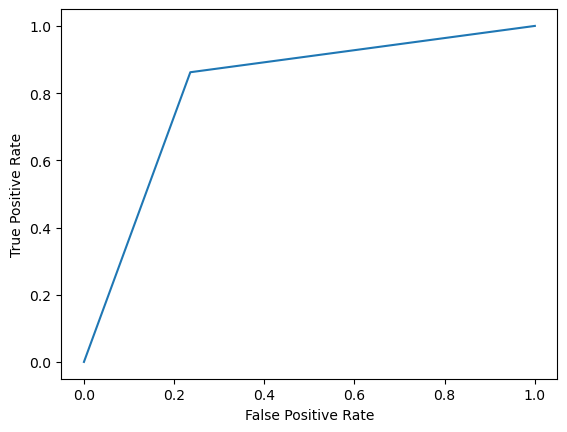

For Kernel rbf :::
Training Score : 0.7930108418155897
Test Score : 0.7838645418326693


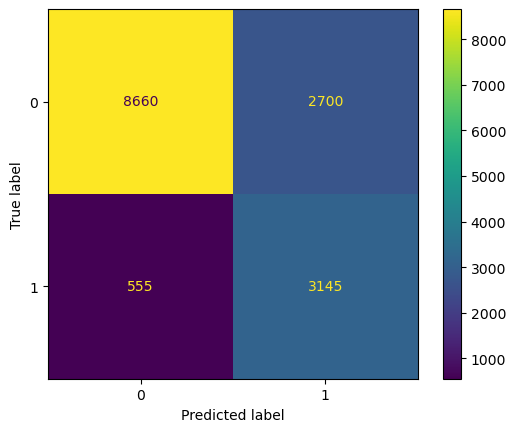

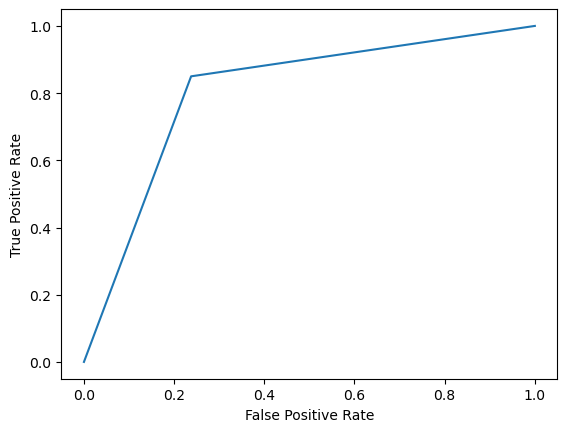

For Kernel poly :::
Training Score : 0.8004708066708663
Test Score : 0.7864541832669323


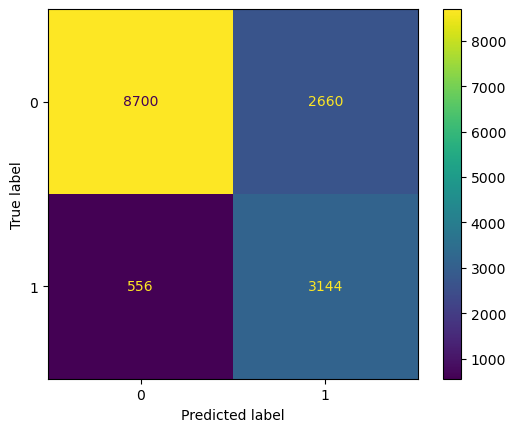

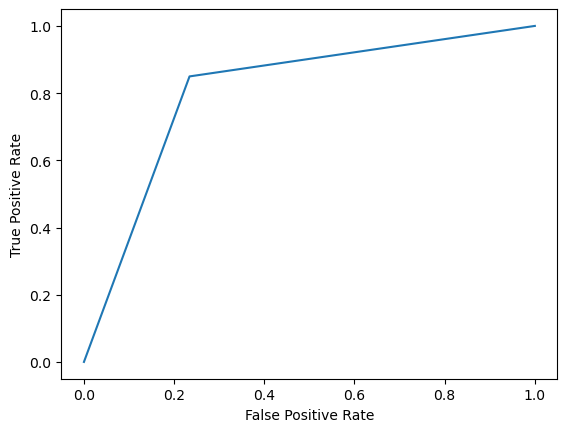

For Kernel sigmoid :::
Training Score : 0.6922184277709625
Test Score : 0.6905710491367862


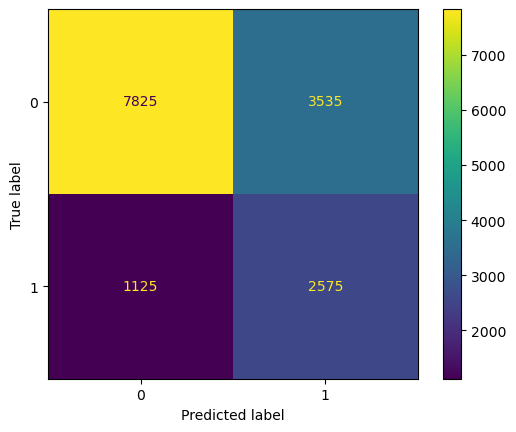

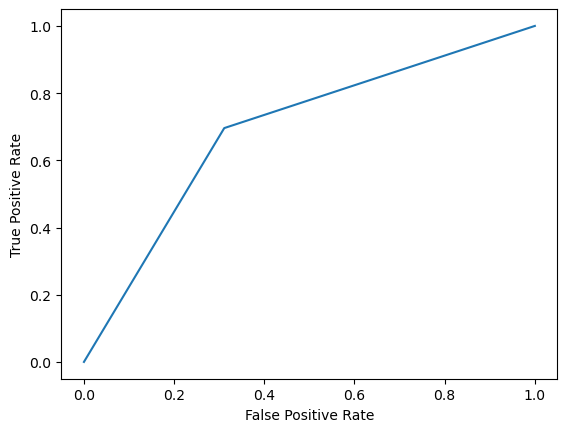

In [54]:
for k in ['linear', 'rbf', 'poly', 'sigmoid']:
    
    print(f"For Kernel {k} :::")
    # Creating a Support Vector classifier with balanced class weights 
    svc = SVC(kernel = k, class_weight = 'balanced', random_state = 42, cache_size = 3000)
    
    # Fitting to and getting accuracy for training set
    svc.fit(X_train, y_train)
    print(f"Training Score : {svc.score(X_train, y_train)}")
    
    # Getting accuracy for testing set
    print(f"Test Score : {svc.score(X_test, y_test)}")
    
    # Predicting target class for test set
    y_pred = svc.predict(X_test)
    
    # Plotting a confusion matrix for the test set
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    # Plotting a ROC curve for the test set
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()

Sigmoid performed worse than other. Lets try with others, with higher c

For Kernel linear :::
Training Score : 0.7872749577268658
Test Score : 0.7885126162018592


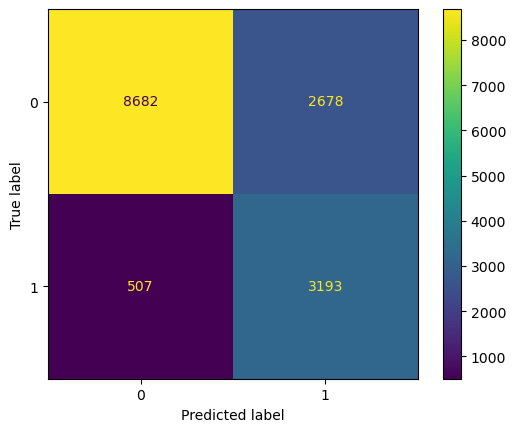

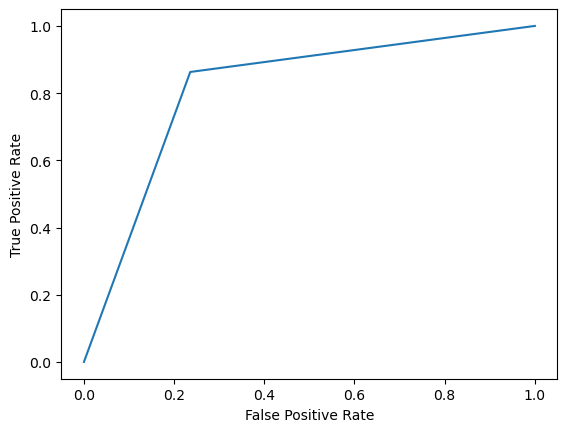

For Kernel rbf :::
Training Score : 0.8327310102450184
Test Score : 0.797144754316069


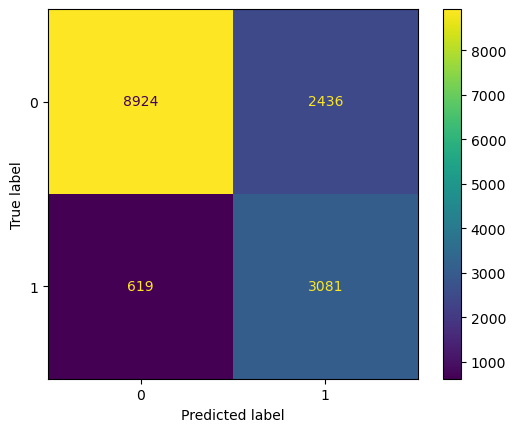

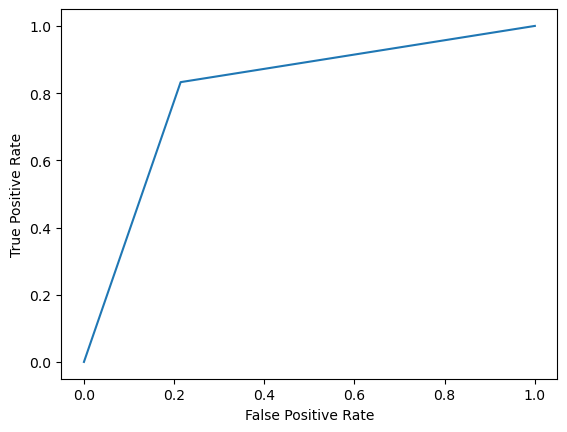

For Kernel poly :::
Training Score : 0.8337256722257219
Test Score : 0.7948207171314741


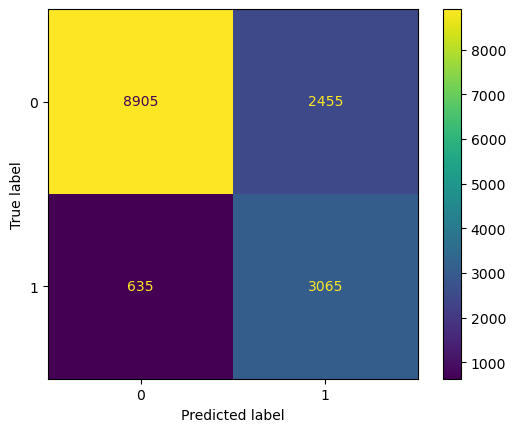

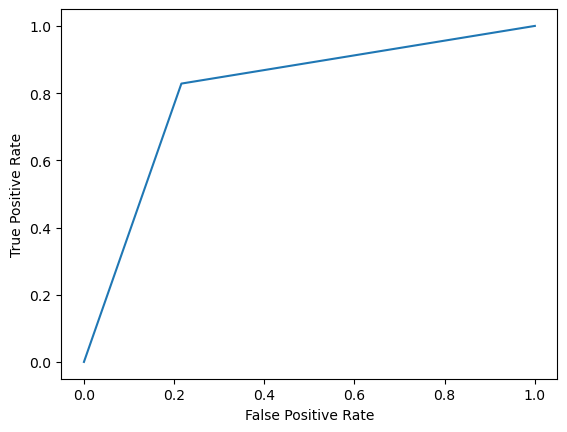

In [55]:
for k in ['linear', 'rbf', 'poly']:
    
    print(f"For Kernel {k} :::")
    # Creating a Support Vector classifier with balanced class weights 
    svc = SVC(kernel = k, C = 10, class_weight = 'balanced', random_state = 42, cache_size = 3000)
    
    # Fitting to and getting accuracy for training set
    svc.fit(X_train, y_train)
    print(f"Training Score : {svc.score(X_train, y_train)}")
    
    # Getting accuracy for testing set
    print(f"Test Score : {svc.score(X_test, y_test)}")
    
    # Predicting target class for test set
    y_pred = svc.predict(X_test)
    
    # Plotting a confusion matrix for the test set
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    # Plotting a ROC curve for the test set
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()

Let's try for a small C value

For Kernel linear :::
Training Score : 0.7091608368422798
Test Score : 0.7106905710491368


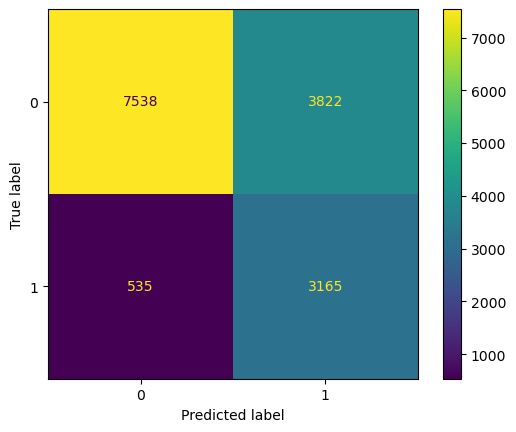

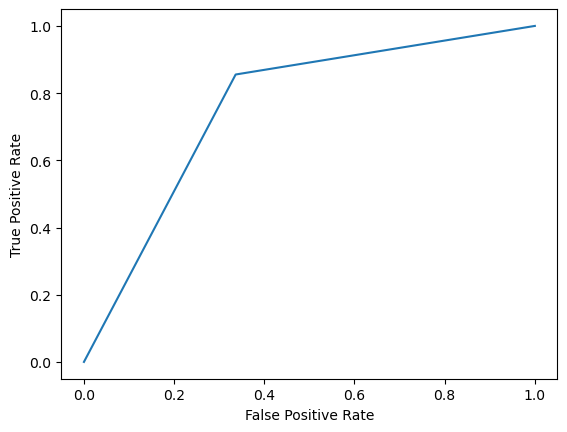

For Kernel rbf :::
Training Score : 0.7140015251483705
Test Score : 0.7154050464807437


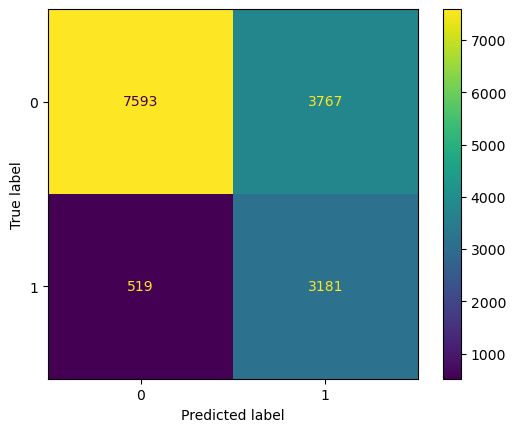

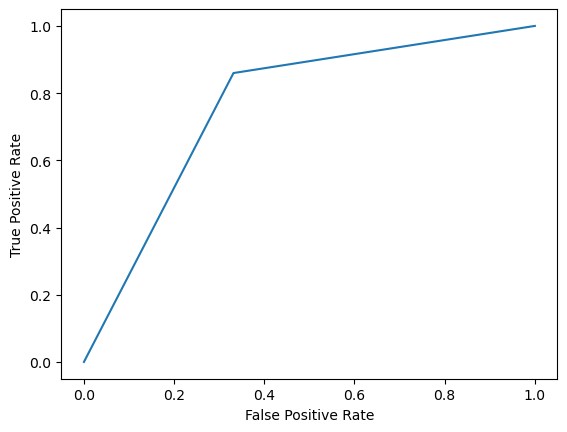

For Kernel poly :::
Training Score : 0.7289214548589238
Test Score : 0.7311420982735723


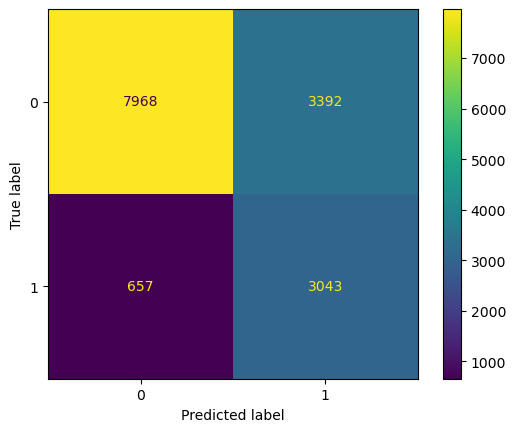

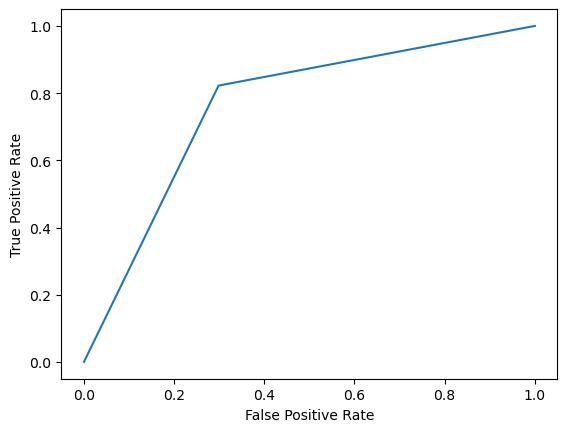

In [56]:
for k in ['linear', 'rbf', 'poly']:
    
    print(f"For Kernel {k} :::")
    # Creating a Support Vector classifier with balanced class weights 
    svc = SVC(kernel = k, C = 0.001, class_weight = 'balanced', random_state = 42, cache_size = 3000)
    
    # Fitting to and getting accuracy for training set
    svc.fit(X_train, y_train)
    print(f"Training Score : {svc.score(X_train, y_train)}")
    
    # Getting accuracy for testing set
    print(f"Test Score : {svc.score(X_test, y_test)}")
    
    # Predicting target class for test set
    y_pred = svc.predict(X_test)
    
    # Plotting a confusion matrix for the test set
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    # Plotting a ROC curve for the test set
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()

We have lesser errors with higher C values

Lets try a polynomial kernel with higher degree, and higher gamma, and rbf with higher gamma

For Kernel rbf :::
Training Score : 0.8644607274294619
Test Score : 0.7857237715803452


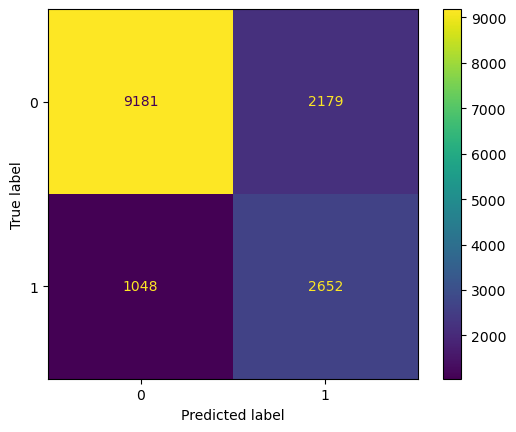

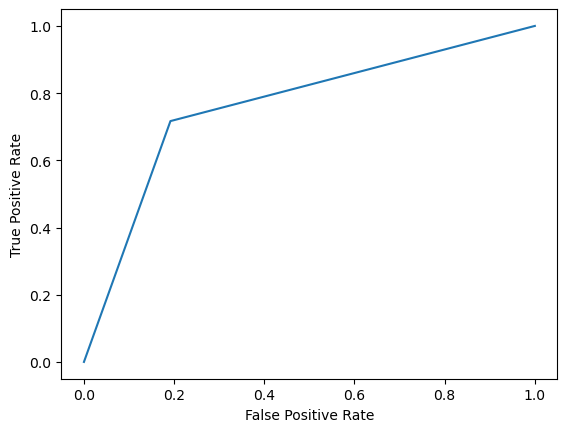

For Kernel poly :::


In [ ]:
for k in ['rbf', 'poly']:
    
    print(f"For Kernel {k} :::")
    # Creating a Support Vector classifier with balanced class weights 
    svc = SVC(kernel = k, C = 10, degree = 5, gamma = 2, class_weight = 'balanced', random_state = 42, cache_size = 3000)
    
    # Fitting to and getting accuracy for training set
    svc.fit(X_train, y_train)
    print(f"Training Score : {svc.score(X_train, y_train)}")
    
    # Getting accuracy for testing set
    print(f"Test Score : {svc.score(X_test, y_test)}")
    
    # Predicting target class for test set
    y_pred = svc.predict(X_test)
    
    # Plotting a confusion matrix for the test set
    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.show()
    
    # Plotting a ROC curve for the test set
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
    plt.show()

## Conclusion

- As this is a large dataset, SVM takes a lot of time to finish
- The best score we got was for linear kernel with C = 10
- Increasing gamma is overfitting the data